In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import accuracy_score
import os
os.getcwd()

'C:\\Users\\navee\\Desktop\\data science python\\machine learning'

In [10]:
df= pd.read_csv('C://Users//navee//Desktop/car_evaluation.csv')
df.head(10)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [11]:
col_names=["buying","maint","doors","persons","boot","safety","class"]
df.columns=col_names
df.head(10)

,buying,maint,doors,persons,boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [12]:
df.shape

(1727, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   buying   1727 non-null   object
 1   maint    1727 non-null   object
 2   doors    1727 non-null   object
 3   persons  1727 non-null   object
 4   boot     1727 non-null   object
 5   safety   1727 non-null   object
 6   class    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [14]:
df.describe()

,buying,maint,doors,persons,boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [15]:
df.isnull().sum()

buying     0
maint      0
doors      0
persons    0
boot       0
safety     0
class      0
dtype: int64

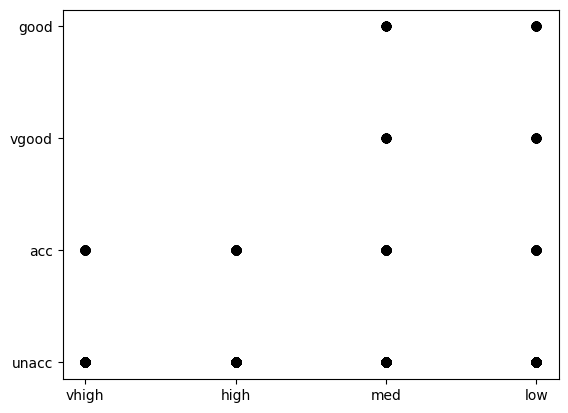

In [16]:
plt.scatter(df["buying"],df["class"],c="black")

<Axes: xlabel='buying', ylabel='class'>

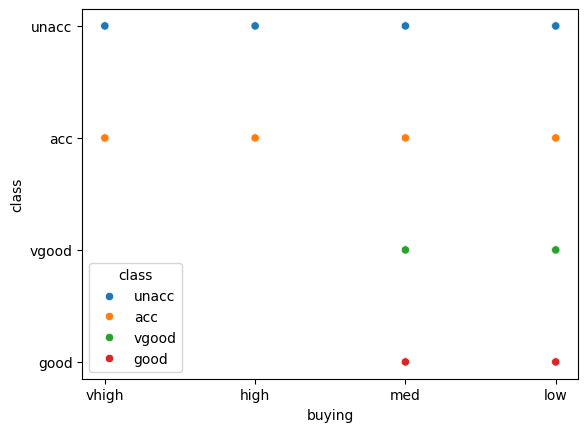

In [17]:
sns.scatterplot(data=df,x="buying",y="class",hue="class",markers="^")

In [18]:
x=df.drop(["class"],axis=1)
x

,buying,maint,doors,persons,boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [19]:
df["class"].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [20]:
y = df["class"]
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: class, Length: 1727, dtype: object

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [22]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1381, 6) (346, 6) (1381,) (346,)


In [23]:
pip install --upgrade category_encoders


Note: you may need to restart the kernel to use updated packages.


In [25]:
import category_encoders as ce 
encode = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','boot','safety'])
x_train = encode.fit_transform(x_train)
x_test = encode.transform(x_test)

In [27]:
x_train.head()

,buying,maint,doors,persons,boot,safety
1518,1,1,1,1,1,1
1516,1,1,1,1,2,2
126,2,2,1,2,3,1
1380,1,3,2,1,2,1
58,2,3,3,1,2,2


In [34]:
x_test.head()

,buying,maint,doors,persons,boot,safety
350,2,4,4,1,3,3
112,2,2,1,1,2,2
1009,3,2,4,3,3,2
1636,1,4,1,3,1,2
1279,3,4,2,3,3,2


In [35]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
from sklearn.metrics import accuracy_score

ypred = clf_gini.predict(x_test)
ypred

array(['unacc', 'unacc', 'acc', 'vgood', 'good', 'unacc', 'unacc',
       'unacc', 'unacc', 'vgood', 'unacc', 'acc', 'unacc', 'acc', 'vgood',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'acc', 'good', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', '

In [44]:
acc = accuracy_score(y_test,ypred)
acc

0.9450867052023122

In [45]:
!pip install graphviz

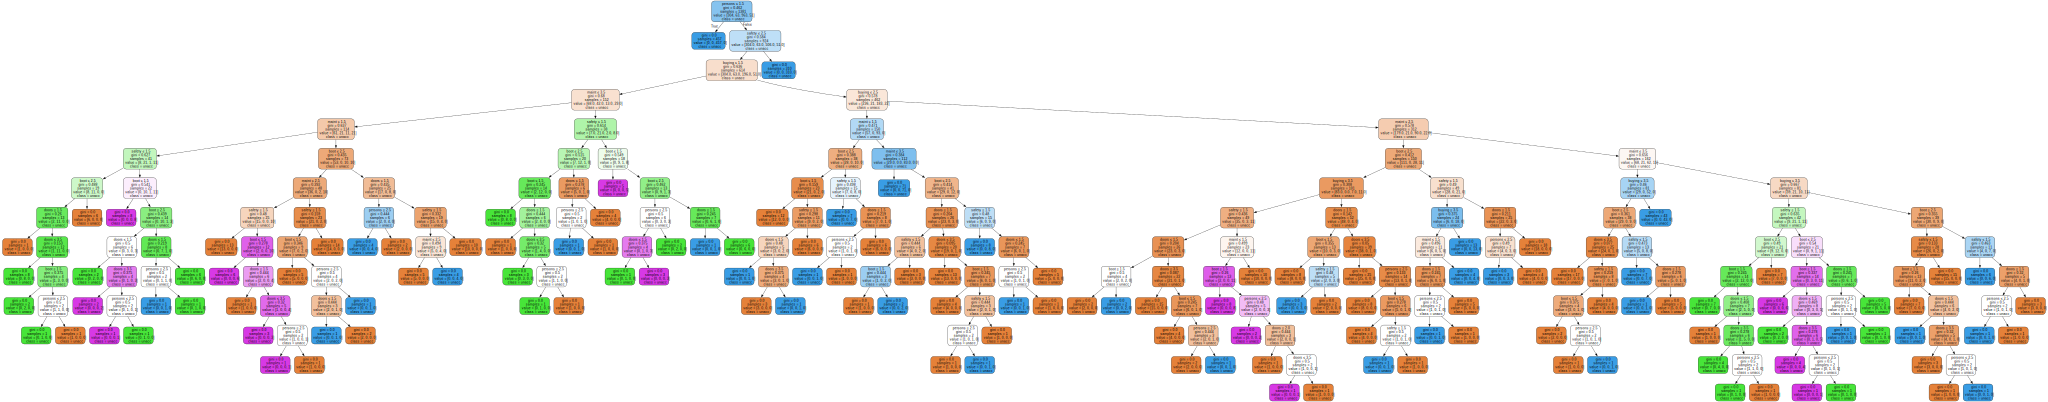

In [46]:
import graphviz 
from sklearn import tree 
data = tree.export_graphviz(clf_gini,out_file=None,feature_names=x_train.columns,class_names=y_train,filled=True,rounded=True,special_characters=True)

graph = graphviz.Source(data)
graph

In [61]:
import pandas as pd
import numpy as np

features = pd.DataFrame({"features":x_train.columns,
                         "importance":np.round(clf_gini.feature_importances_,3)
                        })
features = features.sort_values("importance",ascending=False)

In [63]:
features

,features,importance
5,safety,0.334
3,persons,0.196
1,maint,0.170
0,buying,0.124
4,boot,0.121
2,doors,0.056
